In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [80]:
sample1k_path = '/shared/3/projects/bangzhao/prosodic_embeddings/sample/sampleProsodicFeature10k_cleaned_sample1kchunk.csv'
sample10k_path = '/shared/3/projects/bangzhao/prosodic_embeddings/sample/sampleProsodicFeature10k_cleaned_sample10kchunk.csv'

In [81]:
sample = pd.read_csv(sample10k_path)

In [82]:
sample

,index,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath
0,10276,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
1,10277,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501,-106.331883,111.665362,-10.354052,95.003878,-68.822892,-224.786012,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
2,10278,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
3,10279,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
4,10280,.,29.632018,11.655817,-5.636016,-8.897525,15.986924,754.552002,-118.947718,-21.350030,74.044598,49.553017,-148.652235,883.969784,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119995,10270,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
5119996,10271,",",32.893096,11.895174,13.960909,21.185836,0.000000,509.947634,-66.441370,-257.193141,-207.914074,-404.912865,0.000000,-2135.717850,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
5119997,10272,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
5119998,10273,know,38.867386,11.762248,11.942741,22.211916,27.792478,428.901432,248.431967,-202.129966,-306.210609,-188.875214,-27.338990,2814.148300,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...


In [83]:
def clean_content(text):
    if pd.isnull(text):
        return False
    # Keep only English words
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Check if the cleaned text has English words
    return bool(re.search(r'[a-zA-Z]', cleaned_text))

In [84]:
sample = sample[sample['content'].apply(clean_content)]

In [85]:
# sample.drop(columns=['potentialOutPath']).copy()
sample

,index,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath
0,10276,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
1,10277,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501,-106.331883,111.665362,-10.354052,95.003878,-68.822892,-224.786012,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
2,10278,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
3,10279,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
5,10281,That,33.846611,6.181403,-1.125965,6.314346,22.265658,673.990032,-39.880090,113.061058,98.761525,91.161388,275.149054,64.483964,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119992,10267,trading,37.335804,2.679097,13.839849,15.612555,24.344556,600.761368,54.628323,152.689386,216.390579,44.239855,66.481547,-1098.390900,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
5119994,10269,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
5119995,10270,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
5119997,10272,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...


In [86]:
sample.iloc[0].content

' stay'

In [87]:
def concatenate_and_average(df):
    new_rows = []
    prev_row = None
    
    for index, row in df.iterrows():
        if prev_row is not None and not row['content'].startswith(' '):
            # Concatenate content
            prev_row['content'] += row['content']
            # Average other columns, excluding 'potentialOutPath'
            for col in df.columns:
                if col not in ['content', 'potentialOutPath']:
                    prev_row[col] = (prev_row[col] + row[col]) / 2
        else:
            if prev_row is not None:
                new_rows.append(prev_row)
            prev_row = row.copy()
    
    if prev_row is not None:
        new_rows.append(prev_row)
    
    return pd.DataFrame(new_rows)


In [88]:
sample = sample.drop(columns=['index'])

In [89]:
sample_detokenized = concatenate_and_average(sample)

In [90]:
sample_detokenized

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
1,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501,-106.331883,111.665362,-10.354052,95.003878,-68.822892,-224.786012,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
5,That's,16.486418,5.052794,1.985130,1.831532,11.132829,664.454552,-23.960620,53.618136,46.945743,42.839697,137.574527,-7.457389,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119992,trading,37.335804,2.679097,13.839849,15.612555,24.344556,600.761368,54.628323,152.689386,216.390579,44.239855,66.481547,-1098.390900,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
5119994,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
5119995,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
5119997,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...


In [91]:
sample_detokenized.to_csv('/shared/3/projects/bangzhao/prosodic_embeddings/sample/sample_10k_detokenized.csv', index=False)

## visualize top 200 tokens

In [5]:
sample_detokenized = pd.read_csv('/shared/3/projects/bangzhao/prosodic_embeddings/sample/sample_10k_detokenized.csv')

In [6]:
sample_detokenized

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
1,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501,-106.331883,111.665362,-10.354052,95.003878,-68.822892,-224.786012,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
4,That's,16.486418,5.052794,1.985130,1.831532,11.132829,664.454552,-23.960620,53.618136,46.945743,42.839697,137.574527,-7.457389,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127620,trading,37.335804,2.679097,13.839849,15.612555,24.344556,600.761368,54.628323,152.689386,216.390579,44.239855,66.481547,-1098.390900,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127621,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127622,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127623,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...


In [7]:
sample_detokenized['content'] = sample_detokenized['content'].str.lower()

In [8]:
top200 = sample_detokenized.content.value_counts().index.to_list()[:200]

In [9]:
sample_top200 = sample_detokenized[sample_detokenized['content'].isin(top200)]

In [14]:
sample_top200 = sample_top200.drop(columns=['potentialOutPath'])
sample_top200

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525
4,that's,16.486418,5.052794,1.985130,1.831532,11.132829,664.454552,-23.960620,53.618136,46.945743,42.839697,137.574527,-7.457389
5,it,20.153736,35.894288,11.419930,-5.823066,21.980004,616.562440,-72.576676,179.474248,81.020581,65.747899,138.830349,-1752.989118
7,everything,20.164067,-13.636764,10.263043,-30.858269,29.538364,595.229705,-12.655702,-8.030167,31.075965,31.454033,-9.742869,-152.066575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127619,this,3.327195,13.939536,11.938853,9.306583,3.596382,772.512601,-168.674409,-128.982210,28.644472,-50.902870,-62.675950,1726.561827
4127621,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286
4127622,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650
4127623,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652


In [15]:
sample_top200 = sample_top200.groupby('content').mean()

In [16]:
sample_top200

,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope
content,,,,,,,,,,,,
a,23.385507,1.343076,11.494773,-5.521174,18.892449,682.673608,8.086062,-3.947611,-2.080639,-7.057664,7.435369,-28.847584
able,25.234199,3.849515,16.985077,-6.874104,20.201722,676.666767,-8.951388,5.444790,-13.487093,1.937456,-8.136986,79.940560
about,26.210620,-1.825897,7.406057,-7.795789,18.376717,675.085471,-7.507114,-1.640682,-5.583464,0.167492,-9.246581,2.134717
actually,18.794008,-2.652891,14.448364,-5.165149,18.189422,691.470842,-10.840349,16.405172,11.104191,3.681597,-4.546999,27.951618
after,22.831507,-4.637616,8.527401,-4.372156,17.460467,678.900747,-15.437216,8.851803,-0.965961,10.542864,-9.200795,32.687109
...,...,...,...,...,...,...,...,...,...,...,...,...
years,21.696922,3.148653,19.876204,-1.505272,19.333954,686.771520,-6.104064,-0.421495,-11.934969,6.463319,-10.596874,32.986184
yes,15.447947,1.527505,12.469913,-4.269662,15.814115,692.492952,-11.579804,-17.539122,-20.577333,-1.441773,-6.301697,-14.490502
you,22.256392,3.544502,18.727051,-3.076302,19.015136,688.717559,0.324245,-6.802764,-6.667004,0.148467,0.487097,7.405248


In [17]:
sample_top200.to_csv('/shared/3/projects/bangzhao/prosodic_embeddings/sample/sample_10k_top200_tokens.csv')

## visualization

In [2]:
sample_top200 = pd.read_csv('/shared/3/projects/bangzhao/prosodic_embeddings/sample/sample_10k_top200_tokens.csv')

In [18]:
sample_top200

,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope
content,,,,,,,,,,,,
a,23.385507,1.343076,11.494773,-5.521174,18.892449,682.673608,8.086062,-3.947611,-2.080639,-7.057664,7.435369,-28.847584
able,25.234199,3.849515,16.985077,-6.874104,20.201722,676.666767,-8.951388,5.444790,-13.487093,1.937456,-8.136986,79.940560
about,26.210620,-1.825897,7.406057,-7.795789,18.376717,675.085471,-7.507114,-1.640682,-5.583464,0.167492,-9.246581,2.134717
actually,18.794008,-2.652891,14.448364,-5.165149,18.189422,691.470842,-10.840349,16.405172,11.104191,3.681597,-4.546999,27.951618
after,22.831507,-4.637616,8.527401,-4.372156,17.460467,678.900747,-15.437216,8.851803,-0.965961,10.542864,-9.200795,32.687109
...,...,...,...,...,...,...,...,...,...,...,...,...
years,21.696922,3.148653,19.876204,-1.505272,19.333954,686.771520,-6.104064,-0.421495,-11.934969,6.463319,-10.596874,32.986184
yes,15.447947,1.527505,12.469913,-4.269662,15.814115,692.492952,-11.579804,-17.539122,-20.577333,-1.441773,-6.301697,-14.490502
you,22.256392,3.544502,18.727051,-3.076302,19.015136,688.717559,0.324245,-6.802764,-6.667004,0.148467,0.487097,7.405248


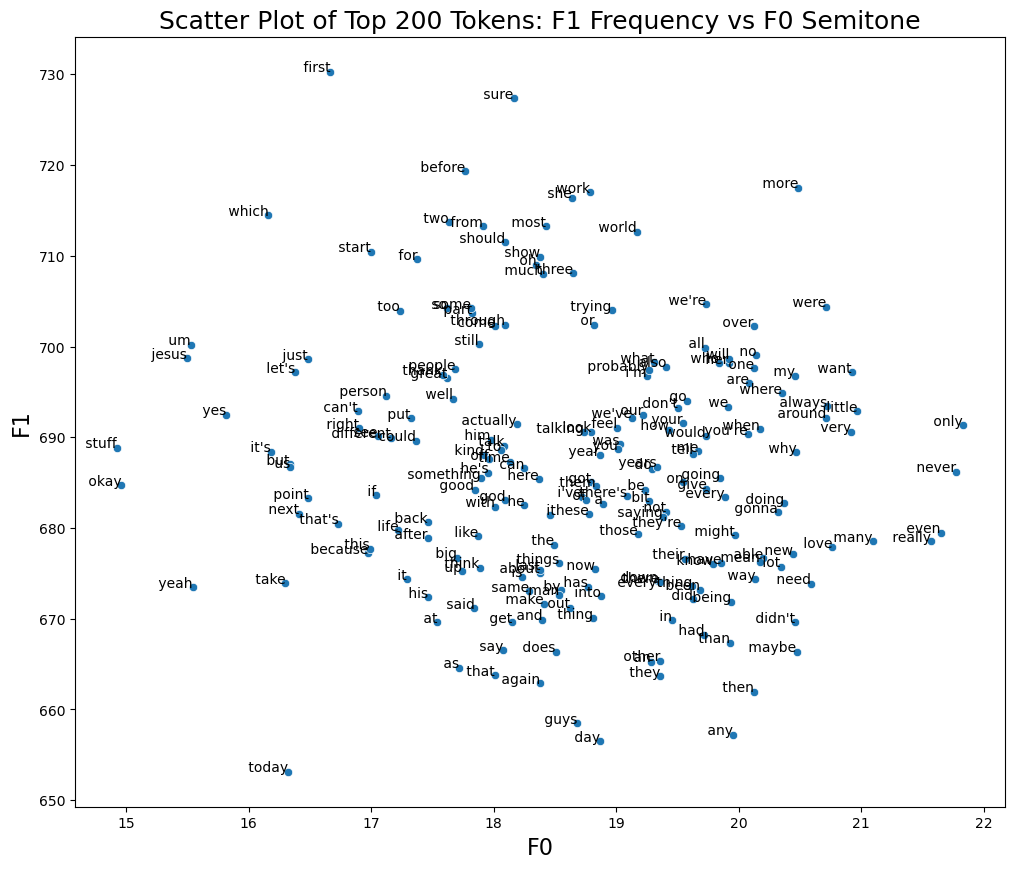

In [24]:
plt.figure(figsize=(12, 10), dpi=100)
sns.scatterplot(data=sample_top200, x='F0semitoneFrom27.5Hz_sma3nz', y='F1frequency_sma3nz')

for i in range(sample_top200.shape[0]):
    plt.text(
        sample_top200['F0semitoneFrom27.5Hz_sma3nz'].iloc[i],
        sample_top200['F1frequency_sma3nz'].iloc[i],
        sample_top200.index[i],
        fontsize=10,
        ha='right'
    )

plt.xlabel('F0', fontsize=16)
plt.ylabel('F1', fontsize=16)
plt.title('Scatter Plot of Top 200 Tokens: F1 Frequency vs F0 Semitone', fontsize=18)

# Save the figure as a PNG
plt.savefig('/shared/3/projects/bangzhao/prosodic_embeddings/figures/sample_top200_f0_f1.png', format='png')
plt.show()

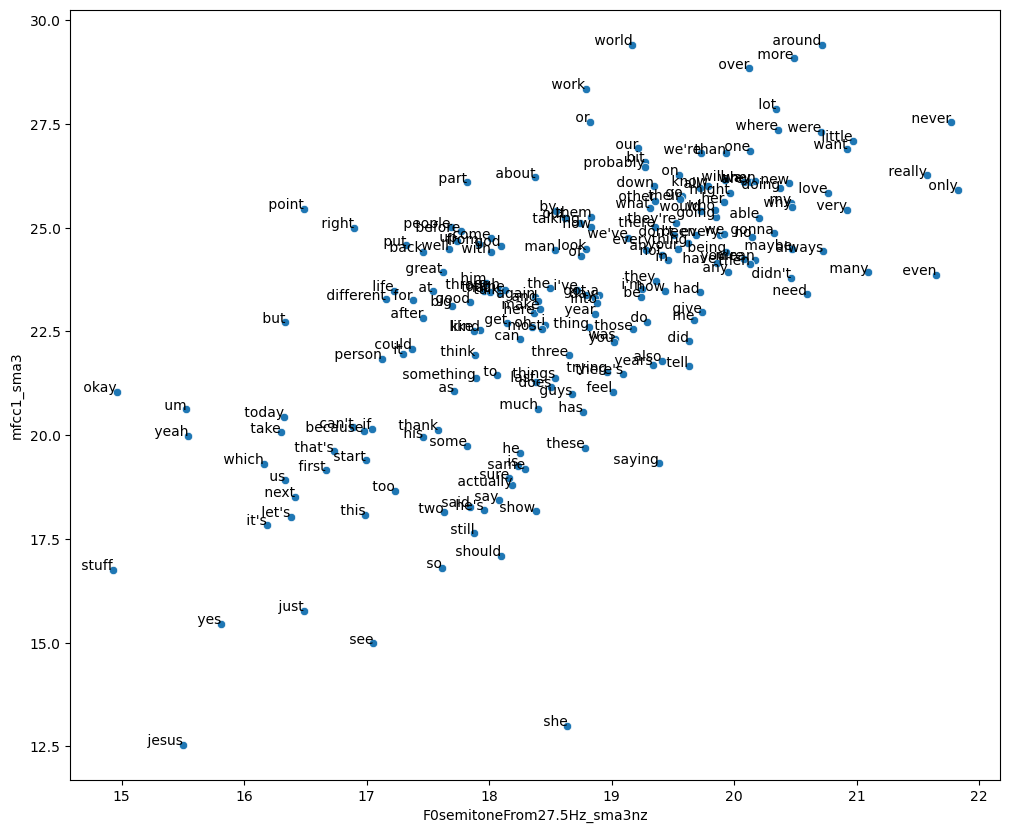

In [65]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=sample_top200, x='F0semitoneFrom27.5Hz_sma3nz', y='mfcc1_sma3')

for i in range(sample_top200.shape[0]):
    plt.text(
        sample_top200['F0semitoneFrom27.5Hz_sma3nz'].iloc[i],
        sample_top200['mfcc1_sma3'].iloc[i],
        sample_top200.index[i],
        fontsize=10,
        ha='right'
    )

plt.show()

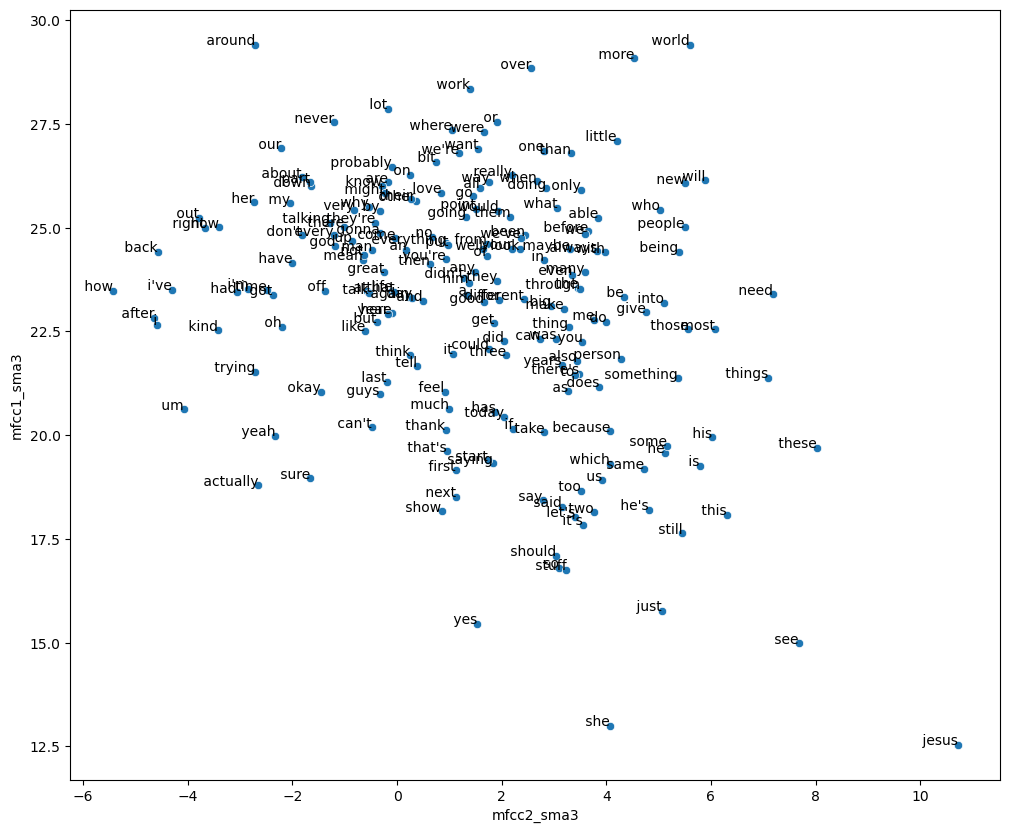

In [66]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=sample_top200, x='mfcc2_sma3', y='mfcc1_sma3')

for i in range(sample_top200.shape[0]):
    plt.text(
        sample_top200['mfcc2_sma3'].iloc[i],
        sample_top200['mfcc1_sma3'].iloc[i],
        sample_top200.index[i],
        fontsize=10,
        ha='right'
    )

plt.show()

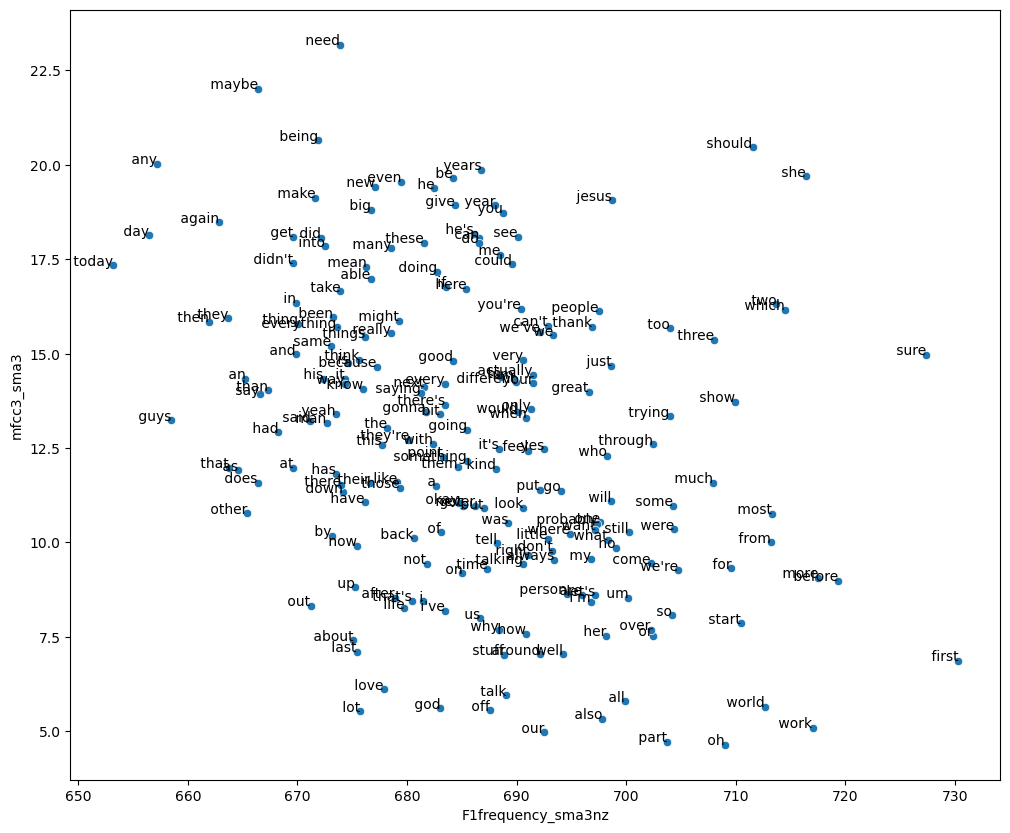

In [69]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=sample_top200, x='F1frequency_sma3nz', y='mfcc3_sma3')

for i in range(sample_top200.shape[0]):
    plt.text(
        sample_top200['F1frequency_sma3nz'].iloc[i],
        sample_top200['mfcc3_sma3'].iloc[i],
        sample_top200.index[i],
        fontsize=10,
        ha='right'
    )

plt.show()

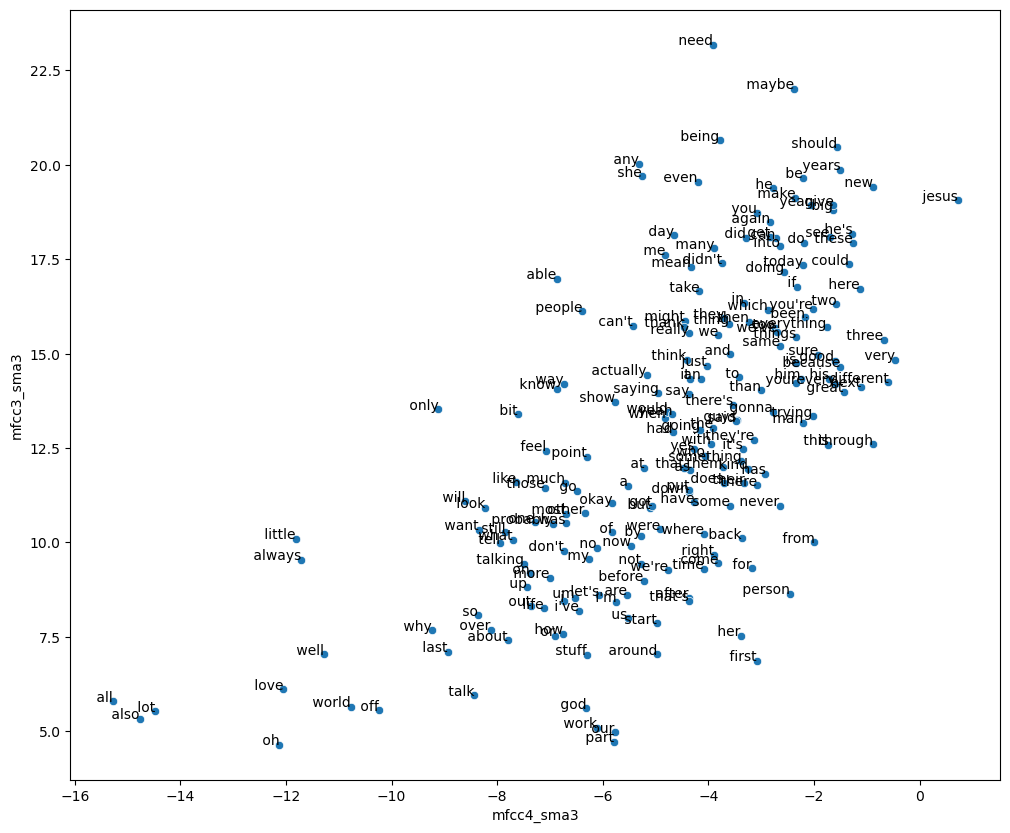

In [70]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=sample_top200, x='mfcc4_sma3', y='mfcc3_sma3')

for i in range(sample_top200.shape[0]):
    plt.text(
        sample_top200['mfcc4_sma3'].iloc[i],
        sample_top200['mfcc3_sma3'].iloc[i],
        sample_top200.index[i],
        fontsize=10,
        ha='right'
    )

plt.show()

## clustering distributions (token level)

In [121]:
sample_detokenized = pd.read_csv('/shared/3/projects/bangzhao/prosodic_embeddings/sample/sample_10k_detokenized.csv')
sample_detokenized['content'] = sample_detokenized['content'].str.lower()

In [122]:
sample_detokenized

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
1,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501,-106.331883,111.665362,-10.354052,95.003878,-68.822892,-224.786012,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
4,that's,16.486418,5.052794,1.985130,1.831532,11.132829,664.454552,-23.960620,53.618136,46.945743,42.839697,137.574527,-7.457389,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127620,trading,37.335804,2.679097,13.839849,15.612555,24.344556,600.761368,54.628323,152.689386,216.390579,44.239855,66.481547,-1098.390900,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127621,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127622,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127623,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...


In [123]:
sample_detokenized_cleaned = sample_detokenized.dropna()

In [124]:
kmeans = joblib.load('/shared/3/projects/bangzhao/prosodic_embeddings/sample/kmeans/kmeans_plusplus_5k_1000.pkl')

In [125]:
X = sample_detokenized_cleaned[['mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3', 'mfcc4_sma3', 'F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz']]

In [126]:
labels = kmeans.predict(X)

In [127]:
sample_detokenized_cleaned.loc[:, 'cluster_id'] = labels

/tmp/ipykernel_3086983/725624458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_detokenized_cleaned.loc[:, 'cluster_id'] = labels


In [128]:
sample_detokenized_cleaned

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath,cluster_id
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,619
1,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501,-106.331883,111.665362,-10.354052,95.003878,-68.822892,-224.786012,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,872
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,418
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,163
4,that's,16.486418,5.052794,1.985130,1.831532,11.132829,664.454552,-23.960620,53.618136,46.945743,42.839697,137.574527,-7.457389,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127620,trading,37.335804,2.679097,13.839849,15.612555,24.344556,600.761368,54.628323,152.689386,216.390579,44.239855,66.481547,-1098.390900,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,14
4127621,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,834
4127622,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,34
4127623,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,837


In [129]:
word = sample_detokenized_cleaned[sample_detokenized_cleaned['content']==' stay']

In [130]:
word 

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath,cluster_id
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,619
1674,stay,32.421319,10.029744,2.153445,-16.935221,9.770986,691.850550,55.352126,71.117397,-71.849854,-145.051462,232.278649,1300.246214,/mcdn.podbean.com/es/httpsmcdn.podbean.commfwe...,967
2030,stay,34.121436,-22.736883,5.946311,-20.084973,32.538340,868.322132,100.396824,-50.824661,-91.915500,-58.927722,2.217368,-942.030157,/sphinx.acast.com/5b/httpssphinx.acast.compope...,68
7826,stay,33.903345,22.695347,5.206860,3.312884,16.389321,735.780940,-111.952388,18.946945,21.485342,79.446240,-127.008213,894.469027,/dts.podtrac.com/i_/httpsdts.podtrac.comredire...,383
9041,stay,13.317838,12.169996,26.152046,-4.160506,0.000000,663.736254,14.429749,37.935952,-27.989542,2.086861,0.000000,-625.295069,/anchor.fm/2d/httpsanchor.fms1db5120cpodcastpl...,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114075,stay,-33.979302,35.337536,3.808777,0.294540,17.834194,816.900452,86.719750,-192.865524,37.225794,-112.040785,-19.404628,-1818.338924,/static1.squarespace.com/51/httpsstatic1.squar...,229
4114362,stay,12.817178,-22.597445,11.047383,-11.934930,14.306487,1023.920944,280.276282,-140.609441,168.451250,-121.762949,12.102186,321.602256,/static1.squarespace.com/51/httpsstatic1.squar...,654
4119465,stay,19.670585,-2.380666,44.877161,-5.612937,19.039618,460.857969,-79.298268,94.515513,-78.909812,55.598768,-217.138267,4503.886658,/static1.squarespace.com/50/httpsstatic1.squar...,497
4119471,stay,33.521466,-7.903068,11.531466,2.973368,20.630999,790.008463,59.887658,-65.904283,-43.828247,-10.743661,57.564240,-1286.222971,/static1.squarespace.com/50/httpsstatic1.squar...,395


In [131]:
len(word['cluster_id'].unique())

547

In [172]:
content_counts = sample_detokenized_cleaned['content'].value_counts()

filtered_words = sample_detokenized_cleaned[sample_detokenized_cleaned['content'].isin(content_counts[content_counts > 1000].index)]

In [173]:
filtered_words

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath,cluster_id
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,619
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,418
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,163
4,that's,16.486418,5.052794,1.985130,1.831532,11.132829,664.454552,-23.960620,53.618136,46.945743,42.839697,137.574527,-7.457389,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,378
5,it,20.153736,35.894288,11.419930,-5.823066,21.980004,616.562440,-72.576676,179.474248,81.020581,65.747899,138.830349,-1752.989118,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127619,this,3.327195,13.939536,11.938853,9.306583,3.596382,772.512601,-168.674409,-128.982210,28.644472,-50.902870,-62.675950,1726.561827,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,265
4127621,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,834
4127622,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,34
4127623,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,837


In [174]:
filtered_words.content.value_counts()

content
the        149919
and        139430
to         123260
i          107830
you         99781
            ...  
playing      1017
top          1015
amazing      1013
wrong        1012
isn't        1005
Name: count, Length: 387, dtype: int64

In [175]:
cluster_counts = filtered_words.groupby('content')['cluster_id'].nunique()

In [176]:
cluster_counts

content
a             999
able          861
about         981
absolutely    500
actually      830
             ... 
you           998
you're        956
you've        760
your          989
yourself      609
Name: cluster_id, Length: 387, dtype: int64

In [177]:
filtered_words[filtered_words['content']== ' a']

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath,cluster_id
38,a,16.447002,-8.134481,18.555158,-21.888398,27.183682,632.541580,85.123495,-658.684493,-375.590645,-855.901225,-1087.806350,-699.967400,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,824
50,a,28.534582,10.393627,22.642449,-22.883509,23.987624,648.119393,-86.399845,-120.913200,326.620355,64.112890,-478.258640,-1670.523550,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,475
89,a,35.434368,-20.365800,-2.181894,0.207828,32.879354,704.724790,512.420250,-322.565800,134.468260,30.605960,-4.230800,12340.503250,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,25
179,a,12.316369,8.461591,-14.785752,-3.908885,0.000000,487.333160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,728
311,a,34.465446,7.979365,-9.511347,8.729289,24.496531,616.351290,186.876675,-59.451200,63.021900,-374.639850,18.476900,5012.688250,/api.spreaker.com/_o/httpsapi.spreaker.comdown...,897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127535,a,42.393908,24.723149,26.073248,5.872061,28.628286,535.162781,15.234687,75.899093,92.335546,86.462525,-3.444702,-1577.493607,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,99
4127538,a,40.327117,27.045463,4.161450,4.523970,29.349085,683.000378,180.519390,-137.099495,-337.033762,-242.476871,32.232745,6590.117450,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,832
4127541,a,37.135271,19.863777,13.566272,25.729592,25.092126,495.832483,104.252075,-175.581250,-124.644555,-43.387445,-25.558165,-5416.542750,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,916
4127550,a,40.865421,15.286136,-16.536850,-12.000598,8.311095,504.813024,-90.402434,60.928552,24.315766,244.253918,259.034307,3565.364911,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,722


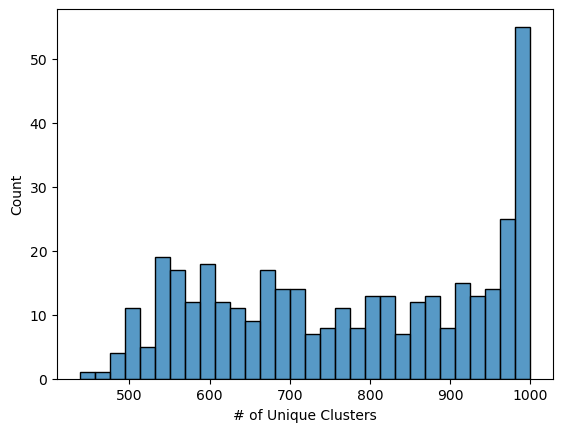

In [178]:
sns.histplot(data=cluster_counts, bins=30)
plt.xlabel('# of Unique Clusters')

plt.show()

In [179]:
# Count occurrences of each 'content' value
content_counts = filtered_words['content'].value_counts()

# Calculate the ratio
ratio_df = (cluster_counts / content_counts)
ratio_df.columns = ['content', 'cluster_ratio']

In [180]:
ratio_df

content
a             0.011244
able          0.268978
about         0.052200
absolutely    0.421585
actually      0.160822
                ...   
you           0.010002
you're        0.080289
you've        0.296643
your          0.052984
yourself      0.335168
Length: 387, dtype: float64

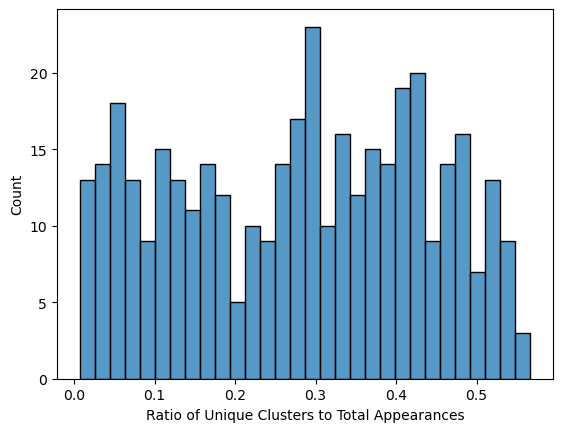

In [181]:
sns.histplot(data=ratio_df, bins=30)
plt.xlabel('Ratio of Unique Clusters to Total Appearances')

plt.show()

## clustering distributions (episode level)

In [92]:
sample_detokenized = pd.read_csv('/shared/3/projects/bangzhao/prosodic_embeddings/sample/sample_10k_detokenized.csv')

In [93]:
sample_detokenized

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
1,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501,-106.331883,111.665362,-10.354052,95.003878,-68.822892,-224.786012,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
4,That's,16.486418,5.052794,1.985130,1.831532,11.132829,664.454552,-23.960620,53.618136,46.945743,42.839697,137.574527,-7.457389,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127620,trading,37.335804,2.679097,13.839849,15.612555,24.344556,600.761368,54.628323,152.689386,216.390579,44.239855,66.481547,-1098.390900,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127621,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127622,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127623,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...


In [94]:
sample_detokenized_cleaned = sample_detokenized.dropna()

In [95]:
sample_detokenized_cleaned

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
1,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501,-106.331883,111.665362,-10.354052,95.003878,-68.822892,-224.786012,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
4,That's,16.486418,5.052794,1.985130,1.831532,11.132829,664.454552,-23.960620,53.618136,46.945743,42.839697,137.574527,-7.457389,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127620,trading,37.335804,2.679097,13.839849,15.612555,24.344556,600.761368,54.628323,152.689386,216.390579,44.239855,66.481547,-1098.390900,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127621,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127622,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...
4127623,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...


In [96]:
kmeans = joblib.load('/shared/3/projects/bangzhao/prosodic_embeddings/sample/kmeans/kmeans_plusplus_5k_1000.pkl')

In [97]:
X = sample_detokenized_cleaned[['mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3', 'mfcc4_sma3', 'F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz']]

In [98]:
labels = kmeans.predict(X)

In [99]:
sample_detokenized_cleaned.loc[:, 'cluster_id'] = labels

/tmp/ipykernel_3086983/725624458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_detokenized_cleaned.loc[:, 'cluster_id'] = labels


In [100]:
sample_detokenized_cleaned

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath,cluster_id
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,619
1,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501,-106.331883,111.665362,-10.354052,95.003878,-68.822892,-224.786012,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,872
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,418
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,163
4,That's,16.486418,5.052794,1.985130,1.831532,11.132829,664.454552,-23.960620,53.618136,46.945743,42.839697,137.574527,-7.457389,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127620,trading,37.335804,2.679097,13.839849,15.612555,24.344556,600.761368,54.628323,152.689386,216.390579,44.239855,66.481547,-1098.390900,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,14
4127621,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,834
4127622,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,34
4127623,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,837


In [103]:
episode_count = sample_detokenized_cleaned.potentialOutPath.value_counts()

In [182]:
filtered_episodes = sample_detokenized_cleaned[sample_detokenized_cleaned['potentialOutPath'].isin(episode_count[episode_count > 1000].index)]

In [183]:
filtered_episodes

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,potentialOutPath,cluster_id
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189,-223.315859,-75.037065,-199.628723,-19.063757,63.542018,558.789143,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,619
1,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501,-106.331883,111.665362,-10.354052,95.003878,-68.822892,-224.786012,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,872
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277,-81.714324,35.574673,128.870957,-151.741717,133.957375,992.143714,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,418
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369,86.481974,-53.348702,-46.987130,27.312206,17.046917,-463.224525,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,163
4,that's,16.486418,5.052794,1.985130,1.831532,11.132829,664.454552,-23.960620,53.618136,46.945743,42.839697,137.574527,-7.457389,/anchor.fm/2c/httpsanchor.fmsfecf658podcastpla...,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127620,trading,37.335804,2.679097,13.839849,15.612555,24.344556,600.761368,54.628323,152.689386,216.390579,44.239855,66.481547,-1098.390900,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,14
4127621,we,43.341199,21.680601,15.726775,23.116866,26.651412,615.543510,-40.742616,-165.881283,-77.513930,-88.050911,23.558920,-698.508286,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,834
4127622,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096,-14.902895,99.998317,161.907545,79.754211,-150.526370,380.990650,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,34
4127623,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217,5.527652,104.655040,10.270115,15.037327,35.338877,631.515652,/anchor.fm/2t/httpsanchor.fms1f6578f8podcastpl...,837


In [184]:
filtered_episodes.potentialOutPath.value_counts()

potentialOutPath
/www.buzzsprout.com/13/httpswww.buzzsprout.com9227113831815nowplayingpoltergeist.mp3MERGED                                                                        3403
/dts.podtrac.com/re/httpsdts.podtrac.comredirect.mp3www.theincomparable.compodcastrandomtrek219.mp3MERGED                                                         3138
/anchor.fm/2t/httpsanchor.fms816224cpodcastplay14281721https3A2F2Fd3ctxlq1ktw2nl.cloudfront.net2Fstaging2F202005252F5e1f365e3daeb5435f7d106e9d9906d4.m4aMERGED    3015
/www.buzzsprout.com/39/httpswww.buzzsprout.com7592033983294ep24supermariobros.mp3MERGED                                                                           2902
/anchor.fm/21/httpsanchor.fms1e4255b8podcastplay13913429https3A2F2Fd3ctxlq1ktw2nl.cloudfront.net2Fproduction2F20204182F7426169844100266684d4fb519.mp3MERGED       2855
                                                                                                                                                    

In [185]:
episode_cluster_counts = filtered_episodes.groupby('potentialOutPath')['cluster_id'].nunique()

In [186]:
episode_cluster_counts

potentialOutPath
/CalvaryQC.sermon.net/ti/httpsCalvaryQC.sermon.net21592037controllerlinkactionpodcasttypeaudio_mark21322itsamismatchid3478830.mp3MERGED                         503
/abcmedia.akamaized.net/02/httpsabcmedia.akamaized.netrnpodcast202005mld_20200527.mp3MERGED                                                                     477
/anchor.fm/01/httpsanchor.fms1e330cd4podcastplay14490167https3A2F2Fd3ctxlq1ktw2nl.cloudfront.net2Fproduction2F20204302F779340014410020f5111ef7534c.mp3MERGED    528
/anchor.fm/02/httpsanchor.fms109f6f68podcastplay14334087https3A2F2Fd3ctxlq1ktw2nl.cloudfront.net2Fproduction2F20204262F769393134800020bdbd504cd604.mp3MERGED    740
/anchor.fm/02/httpsanchor.fms163bc8e0podcastplay15007058https3A2F2Fd3ctxlq1ktw2nl.cloudfront.net2Fproduction2F20205102F8116737044100235d218c9c0c3e.mp3MERGED    520
                                                                                                                                                               ... 

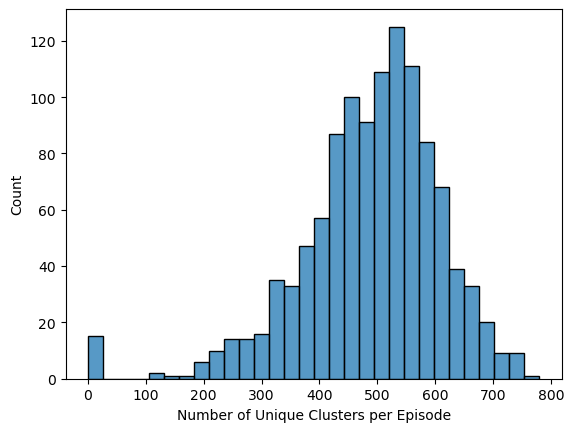

In [187]:
sns.histplot(data=episode_cluster_counts)
plt.xlabel('Number of Unique Clusters per Episode')

plt.show()